<a href="https://colab.research.google.com/github/barkhahbpp/sistem-cerdas/blob/main/Lung_Cancer_MLP_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Lung Cancer dengan Menggunakan MLP #

Dataset : https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

## Load Dataset ##

Detil Fitur Data adalah sebagai berikut :

|Field name|Description|
|--- |--- |
|Age	|The age of the patient. (Numeric)|
|Gender	|The gender of the patient. (Categorical)|
|Air Pollution |The level of air pollution exposure of the patient. (Categorical)|
|Alcohol use	|The level of alcohol use of the patient. (Categorical)|
|Dust Allergy	|The level of dust allergy of the patient. (Categorical)|
|OccuPational Hazards	|The level of occupational hazards of the patient. (Categorical)|
|Genetic Risk	|The level of genetic risk of the patient. (Categorical)|
|chronic Lung Disease	|The level of chronic lung disease of the patient. (Categorical)|
|Balanced Diet	|The level of balanced diet of the patient. (Categorical)|
|Obesity	|The level of obesity of the patient. (Categorical)|
|Smoking	|The level of smoking of the patient. (Categorical)|
|Passive Smoker	|The level of passive smoker of the patient. (Categorical)|
|Chest Pain	|The level of chest pain of the patient. (Categorical)|
|Coughing of Blood	|The level of coughing of blood of the patient. (Categorical)|
|Fatigue	|The level of fatigue of the patient. (Categorical)|
|Weight Loss	|The level of weight loss of the patient. (Categorical)|
|Shortness of Breath	|The level of shortness of breath of the patient. (Categorical)|
|Wheezing	|The level of wheezing of the patient. (Categorical)|
|Swallowing Difficulty	|The level of swallowing difficulty of the patient. (Categorical)|
|Clubbing of Finger Nails	|The level of clubbing of finger nails of the patient. (Categorical)|

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Berikut adalah proses Load Data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
lungCr_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/cancer patient data sets.csv')
lungCr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [19]:
lungCr_df

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

## Data Preprocessiong ##

In [20]:
# Cek Record Redundant
sum(lungCr_df.duplicated())

0

In [21]:
# cek PAtient ID Duplicate
sum(lungCr_df["Patient Id"].duplicated())

0

In [22]:
# Convert data ke Category
lungCr_df["Gender"] = lungCr_df["Gender"].astype('category')
lungCr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     1000 non-null   int64   
 1   Patient Id                1000 non-null   object  
 2   Age                       1000 non-null   int64   
 3   Gender                    1000 non-null   category
 4   Air Pollution             1000 non-null   int64   
 5   Alcohol use               1000 non-null   int64   
 6   Dust Allergy              1000 non-null   int64   
 7   OccuPational Hazards      1000 non-null   int64   
 8   Genetic Risk              1000 non-null   int64   
 9   chronic Lung Disease      1000 non-null   int64   
 10  Balanced Diet             1000 non-null   int64   
 11  Obesity                   1000 non-null   int64   
 12  Smoking                   1000 non-null   int64   
 13  Passive Smoker            1000 non-null   int64  

<ipython-input-28-2ef49459f7cf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lungCr_df.corr(), annot=True, center=0.9)


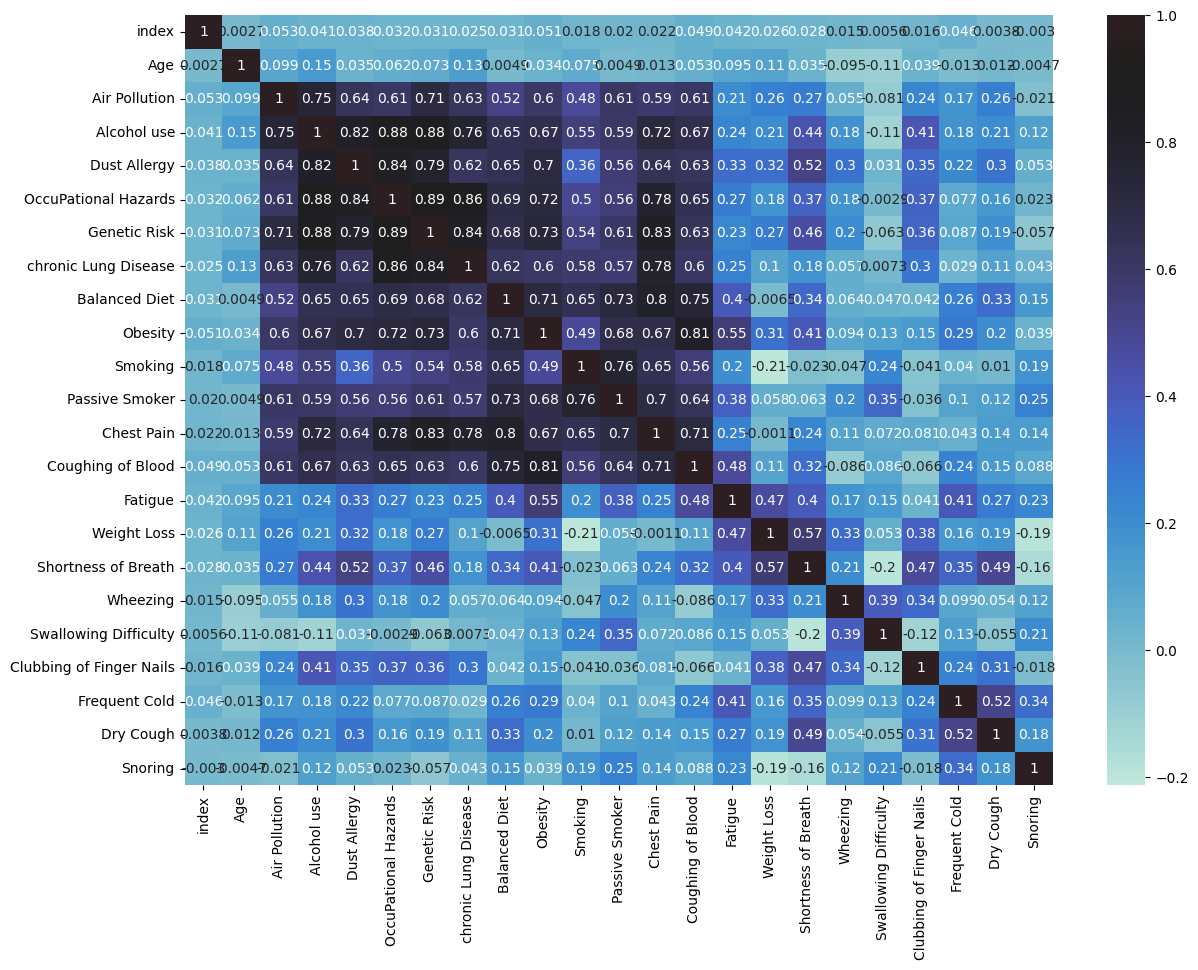

In [28]:

%matplotlib inline
plt.figure(figsize=(14,10))

sns.heatmap(lungCr_df.corr(), annot=True, center=0.9)
plt.show()


In [29]:
# Class Encoding
y = pd.get_dummies(lungCr_df["Level"])
y

High  Low  Medium
0       0    1       0
1       0    0       1
2       1    0       0
3       1    0       0
4       1    0       0
..    ...  ...     ...
995     1    0       0
996     1    0       0
997     1    0       0
998     1    0       0
999     1    0       0

[1000 rows x 3 columns]

In [33]:
lungCr_df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

## Feature Selection ##

Klasifikasi dengan sebagian Feature yang memiliki Korelasi Tinggi

In [34]:
# Pertahankan kolom 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood'
# Hapus sisanya

X = lungCr_df.drop(['index', 'Patient Id', 'Age', 'Gender', 'Fatigue','Weight Loss', 'Shortness of Breath', 'Wheezing','Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'], axis=1)
X

Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
0                2            4             5                     4   
1                3            1             5                     3   
2                4            5             6                     5   
3                7            7             7                     7   
4                6            8             7                     7   
..             ...          ...           ...                   ...   
995              6            7             7                     7   
996              6            8             7                     7   
997              4            5             6                     5   
998              6            8             7                     7   
999              6            5             6                     5   

     Genetic Risk  chronic Lung Disease  Balanced Diet  Obesity  Smoking  \
0               3                     2              2        4        3   
1               4                     2              2        2        2   
2               5                     4              6        7        2   
3               6                     7              7        7        7   
4               7                     6              7        7        8   
..            ...                   ...            ...      ...      ...   
995             7                     6              7        7        7   
996             7                     6              7        7        7   
997             5                     4              6        7        2   
998             7                     6              7        7        8   
999             5                     4              6        7        2   

     Passive Smoker  Chest Pain  Coughing of Blood  
0                 2           2                  4  
1                 4           2                  3  
2                 3           4                  8  
3                 7           7                  8  
4                 7           7                  9  
..              ...         ...                ...  
995               8           7                  7  
996               8           7                  7  
997               3           4                  8  
998               7           7                  9  
999               3           4                  8  

[1000 rows x 12 columns]

## Build Train and Test Dataset ##

In [35]:
# Split Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 382 to 37
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Air Pollution         800 non-null    int64
 1   Alcohol use           800 non-null    int64
 2   Dust Allergy          800 non-null    int64
 3   OccuPational Hazards  800 non-null    int64
 4   Genetic Risk          800 non-null    int64
 5   chronic Lung Disease  800 non-null    int64
 6   Balanced Diet         800 non-null    int64
 7   Obesity               800 non-null    int64
 8   Smoking               800 non-null    int64
 9   Passive Smoker        800 non-null    int64
 10  Chest Pain            800 non-null    int64
 11  Coughing of Blood     800 non-null    int64
dtypes: int64(12)
memory usage: 81.2 KB


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 507 to 207
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Air Pollution         200 non-null    int64
 1   Alcohol use           200 non-null    int64
 2   Dust Allergy          200 non-null    int64
 3   OccuPational Hazards  200 non-null    int64
 4   Genetic Risk          200 non-null    int64
 5   chronic Lung Disease  200 non-null    int64
 6   Balanced Diet         200 non-null    int64
 7   Obesity               200 non-null    int64
 8   Smoking               200 non-null    int64
 9   Passive Smoker        200 non-null    int64
 10  Chest Pain            200 non-null    int64
 11  Coughing of Blood     200 non-null    int64
dtypes: int64(12)
memory usage: 20.3 KB


In [37]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 382 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   High    800 non-null    uint8
 1   Low     800 non-null    uint8
 2   Medium  800 non-null    uint8
dtypes: uint8(3)
memory usage: 8.6 KB


In [38]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 507 to 207
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   High    200 non-null    uint8
 1   Low     200 non-null    uint8
 2   Medium  200 non-null    uint8
dtypes: uint8(3)
memory usage: 2.1 KB


## MLP Classification ##

In [40]:
# MLP Classification Keras

from keras.models import Sequential
from keras.layers import Dense

krmodel = Sequential()
krmodel.add(Dense(6, activation="sigmoid")) # Hidden Layer
krmodel.add(Dense(3, activation="softmax")) # Output Layer

krmodel.compile(loss="categorical_crossentropy", metrics=["accuracy"])
krmodel.fit(X_train, y_train, epochs=60, batch_size=5)

Epoch 1/60
160/160 [==============================] - 1s 3ms/step - loss: 1.1425 - accuracy: 0.3200
Epoch 2/60
160/160 [==============================] - 0s 3ms/step - loss: 1.0897 - accuracy: 0.3750
Epoch 3/60
160/160 [==============================] - 0s 3ms/step - loss: 1.0759 - accuracy: 0.3650
Epoch 4/60
160/160 [==============================] - 0s 3ms/step - loss: 1.0627 - accuracy: 0.4575
Epoch 5/60
160/160 [==============================] - 0s 3ms/step - loss: 1.0449 - accuracy: 0.5150
Epoch 6/60
160/160 [==============================] - 0s 3ms/step - loss: 1.0205 - accuracy: 0.5600
Epoch 7/60
160/160 [==============================] - 0s 3ms/step - loss: 0.9855 - accuracy: 0.5900
Epoch 8/60
160/160 [==============================] - 0s 3ms/step - loss: 0.9547 - accuracy: 0.6037
Epoch 9/60
160/160 [==============================] - 0s 3ms/step - loss: 0.9235 - accuracy: 0.6575
Epoch 10/60
160/160 [==============================] - 1s 3ms/step - loss: 0.8924 - accuracy: 0.7025

In [41]:
krscore = krmodel.evaluate(X_test, y_test)
print("ACCURACY :", krscore)

7/7 [==============================] - 0s 3ms/step - loss: 0.3052 - accuracy: 0.9100
ACCURACY : [0.30523747205734253, 0.9100000262260437]


In [42]:
lungCr_df.head(5)

index Patient Id  Age Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33      1              2            4             5   
1      1        P10   17      1              3            1             5   
2      2       P100   35      1              4            5             6   
3      3      P1000   37      1              7            7             7   
4      4       P101   46      1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

In [43]:
y.head(5)

High  Low  Medium
0     0    1       0
1     0    0       1
2     1    0       0
3     1    0       0
4     1    0       0

## Feature Selection ##
Klasifikasi dengan Semua Feature

In [44]:
# Hapus Kolom Index, Patient Id, Age, Gender, dan level
# Pertahankan sisanya

X = lungCr_df.drop(['index', 'Patient Id', 'Age', 'Gender', 'Level'], axis=1)
X

Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
0                2            4             5                     4   
1                3            1             5                     3   
2                4            5             6                     5   
3                7            7             7                     7   
4                6            8             7                     7   
..             ...          ...           ...                   ...   
995              6            7             7                     7   
996              6            8             7                     7   
997              4            5             6                     5   
998              6            8             7                     7   
999              6            5             6                     5   

     Genetic Risk  chronic Lung Disease  Balanced Diet  Obesity  Smoking  \
0               3                     2              2        4        3   
1               4                     2              2        2        2   
2               5                     4              6        7        2   
3               6                     7              7        7        7   
4               7                     6              7        7        8   
..            ...                   ...            ...      ...      ...   
995             7                     6              7        7        7   
996             7                     6              7        7        7   
997             5                     4              6        7        2   
998             7                     6              7        7        8   
999             5                     4              6        7        2   

     Passive Smoker  ...  Coughing of Blood  Fatigue  Weight Loss  \
0                 2  ...                  4        3            4   
1                 4  ...                  3        1            3   
2                 3  ...                  8        8            7   
3                 7  ...                  8        4            2   
4                 7  ...                  9        3            2   
..              ...  ...                ...      ...          ...   
995               8  ...                  7        5            3   
996               8  ...                  7        9            6   
997               3  ...                  8        8            7   
998               7  ...                  9        3            2   
999               3  ...                  8        8            7   

     Shortness of Breath  Wheezing  Swallowing Difficulty  \
0                      2         2                      3   
1                      7         8                      6   
2                      9         2                      1   
3                      3         1                      4   
4                      4         1                      4   
..                   ...       ...                    ...   
995                    2         7                      8   
996                    5         7                      2   
997                    9         2                      1   
998                    4         1                      4   
999                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  
0                           1              2          3        4  
1                           2              1          7        2  
2                           4              6          7        2  
3                           5              6          7        5  
4                           2              4          2        3  
..                        ...            ...        ...      ...  
995                         2              4          5        3  
996                         4              3          1        4  
997                         4              6          7        2  
998    

## Build Train and Test Dataset ##

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## MLP Classification ##

In [46]:
krmodel2 = Sequential()
krmodel2.add(Dense(6, activation="sigmoid")) # Hidden Layer
krmodel2.add(Dense(3, activation="softmax")) # Output Layer

krmodel2.compile(loss="categorical_crossentropy", metrics=["accuracy"])
krmodel2.fit(X_train, y_train, epochs=60, batch_size=5)

Epoch 1/60
160/160 [==============================] - 2s 6ms/step - loss: 1.0132 - accuracy: 0.5263
Epoch 2/60
160/160 [==============================] - 1s 6ms/step - loss: 0.9403 - accuracy: 0.6525
Epoch 3/60
160/160 [==============================] - 1s 4ms/step - loss: 0.8661 - accuracy: 0.7513
Epoch 4/60
160/160 [==============================] - 1s 4ms/step - loss: 0.7962 - accuracy: 0.7800
Epoch 5/60
160/160 [==============================] - 1s 4ms/step - loss: 0.7355 - accuracy: 0.7937
Epoch 6/60
160/160 [==============================] - 1s 4ms/step - loss: 0.6855 - accuracy: 0.8100
Epoch 7/60
160/160 [==============================] - 1s 4ms/step - loss: 0.6406 - accuracy: 0.8325
Epoch 8/60
160/160 [==============================] - 1s 4ms/step - loss: 0.6010 - accuracy: 0.8425
Epoch 9/60
160/160 [==============================] - 1s 4ms/step - loss: 0.5653 - accuracy: 0.8525
Epoch 10/60
160/160 [==============================] - 1s 4ms/step - loss: 0.5325 - accuracy: 0.8612

In [47]:
krscore2 = krmodel2.evaluate(X_test, y_test)
print("ACCURACY :", krscore2)

7/7 [==============================] - 0s 5ms/step - loss: 0.0452 - accuracy: 1.0000
ACCURACY : [0.04520683363080025, 1.0]
